In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Link to the dataset

https://www.kaggle.com/datasets/datafiniti/electronic-products-prices

In [163]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('DatafinitiElectronicsProductsPricingData.csv')

In [165]:
len(df) # we have 14592 records in dataframe

14592

# 1. Data Cleaning

In [166]:
df.head(2) # we have 31 columns in dataset but we need to delete Unnamed columns

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [167]:
df.drop(columns=['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'], inplace=True)

In [168]:
df.isnull().sum()

id                         0
prices.amountMax           0
prices.amountMin           0
prices.availability     1925
prices.condition        1403
prices.currency            0
prices.dateSeen            0
prices.isSale              0
prices.merchant          772
prices.shipping         5799
prices.sourceURLs          0
asins                      0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    10384
imageURLs                  0
keys                       0
manufacturer            6974
manufacturerNumber         0
name                       0
primaryCategories          0
sourceURLs                 0
upc                        0
weight                     0
dtype: int64

## I assume this information is not useful so we can drop those columns

ean - European Article Number

sourceURLs - link to the website

upc - Universal product code

imageURLs - link to the images

keys ???

dateUpdated ???

asins - amazon standard identification number

prices.sourceURLs - ???

In [169]:
df.drop(columns=['ean', 'upc', 'sourceURLs', 'imageURLs', 'keys', 'dateUpdated', 'asins', 'prices.sourceURLs', 'prices.dateSeen'], inplace=True)

In [170]:
df.shape

(14592, 17)

In [171]:
df.isnull().sum()

id                        0
prices.amountMax          0
prices.amountMin          0
prices.availability    1925
prices.condition       1403
prices.currency           0
prices.isSale             0
prices.merchant         772
prices.shipping        5799
brand                     0
categories                0
dateAdded                 0
manufacturer           6974
manufacturerNumber        0
name                      0
primaryCategories         0
weight                    0
dtype: int64

## Let's check the empty values for each column

### 1. prices.availability

In [172]:
#Let's assume that empty products are "undefined"

prices_availability_mapping = {
    'yes': 'Yes',
    'TRUE': 'Yes',
    '32 available': 'Yes',
    '7 available': 'Yes',
    'sold': 'Out Of Stock',
    'Limited Stock': 'Yes',
    'Discontinued': 'Out Of Stock',
    'More Coming Soon': 'Out Of Stock',
    'Retired': 'Out Of Stock',
    'More on the Way': 'Yes',
    'Special Order': 'Yes',
    'sold': 'Out Of Stock',
    'False': 'Out Of Stock',
    'FALSE': 'Out Of Stock',
    'No': 'Out Of Stock' 
}


In [173]:
df['prices.availability'] = df['prices.availability'].replace(prices_availability_mapping)
df['prices.availability'].fillna('undefined', inplace=True)

In [174]:
df['prices.availability'].value_counts()

prices.availability
Yes             6746
In Stock        5597
undefined       1974
Out Of Stock     275
Name: count, dtype: int64

### 2. prices.condition

In [175]:
df['prices.condition'].value_counts()

prices.condition
New                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [176]:
prices_condition_mapping = {
    'new': 'New',
    'New other (see details)': 'New',
    'Manufacturer refurbished': 'Refurbished',
    'Seller refurbished': 'Refurbished',
    'Brand New': 'New',
    'For parts or not working': 'Refurbished',
    'pre-owned': 'Refurbished',
    'refurbished': 'Refurbished'
}

threshold = 50
df = df[df['prices.condition'].str.len() <= threshold].reset_index(drop=True)
df['prices.condition'] = df['prices.condition'].replace(prices_condition_mapping)

df['prices.condition'].fillna('New', inplace=True)

In [177]:
df['prices.condition'].value_counts()

prices.condition
New            12491
Used             449
Refurbished      241
Name: count, dtype: int64

### 3. prices.merchant

In [178]:
df['prices.merchant'].fillna('undefined', inplace=True)

### 4. prices.shipping

In [179]:
df['prices.shipping'].fillna('Standard', inplace=True)

### 5. manufacturer

In [180]:
mapping = df.dropna(subset=['manufacturer']).set_index('manufacturerNumber')['manufacturer'].to_dict()
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturerNumber'].map(mapping))

In [181]:
df[['manufacturer', 'manufacturerNumber']]

,manufacturer,manufacturerNumber
0,NaN,VLF410B1
1,Boytone,BT-210F
2,Boytone,BT-210F
3,Boytone,BT-210F
4,Boytone,BT-210F
...,...,...
13176,Naxa,SPNA7008
13177,Naxa,SPNA7008
13178,Naxa,SPNA7008
13179,Naxa,SPNA7008


In [182]:
# it is better to drop manufacturer column

df.drop(columns=['manufacturer'], inplace=True)

# 2. Let's try to clean data (not null values)

In [184]:
df.isnull().sum()

id                     0
prices.amountMax       0
prices.amountMin       0
prices.availability    0
prices.condition       0
prices.currency        0
prices.isSale          0
prices.merchant        0
prices.shipping        0
brand                  0
categories             0
dateAdded              0
manufacturerNumber     0
name                   0
primaryCategories      0
weight                 0
dtype: int64

In [185]:
df['dateAdded'] = pd.to_datetime(df['dateAdded']).dt.strftime('%Y-%m-%d')
df['weight_value'] = df['weight'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)
df['weight_unit'] = df['weight'].str.extract(r'([a-zA-Z]+)')

In [187]:
conversion_factors = {
    'pounds': 1,
    'Pounds': 1,
    'lb': 1,
    'lbs': 1,
    'ounces': 1 / 16,
    'ounce': 1 / 16,
    'oz': 1 / 16,
    'OUNCE': 1 / 16,
    'g': 1 / 453.592,
    'Kg': 2.20462,
    'kg': 2.20462
}

df['normalized_value'] = df.apply(
    lambda row: row['weight_value'] * conversion_factors.get(row['weight_unit'], 0) if row['weight_unit'] in conversion_factors else None, axis=1
)

df = df.dropna(subset=['normalized_value']).reset_index(drop=True)

In [ ]:
df['discount'] = (df['prices.amountMax'] - df['prices.amountMin']) * 100 / df['prices.amountMax']

# 3. Data analysis

In [206]:
# top 20 most expensive items

top_20_expensive_items = df.sort_values(by='prices.amountMax', ascending=False).drop_duplicates(subset=['name']).reset_index(drop=True)[['name', 'prices.amountMax']].head(20)
top_20_expensive_items

,name,prices.amountMax
0,Spartan - 3-Target 24x DVD/CD Duplicator - Black,26871.00
1,Samsung - 88 Class - LED - Q9F Series - 2160p ...,19999.99
2,1500-Watt Digital Infrared Heater with Wi-Fi P...,18999.00
3,Gemini - Pro Audio Dual-Channel UHF Wireless M...,12995.00
4,Nikon - AF-S NIKKOR 400mm f/2.8E FL ED VR Lens...,11999.99
5,Details About Garmin Etrex 10 Handheld Outdoor...,10999.00
6,Samsung - 65 Class - LED - MU6290 Series - 216...,6999.99
7,LG Electronics OLED65E6P Flat 65-Inch 4K Ultra...,6999.99
8,Sony 65 Class 4K (2160P) Smart OLED TV (XBR65A...,6499.99
9,PYLE - PylePro 2-way Indoor/Outdoor Speaker - ...,6498.00


In [207]:
# top 10 cheapest items

top_20_expensive_items = df.sort_values(by='prices.amountMin', ascending=True).drop_duplicates(subset=['name']).reset_index(drop=True)[['name', 'prices.amountMin']].head(20)
top_20_expensive_items

,name,prices.amountMin
0,Details About New Nib Novatel 6620l Verizon 4g...,1.00
1,Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...,1.00
2,Apple MacBook Pro with Touch Bar - 13.3 - Core...,1.00
3,Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...,1.00
4,Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...,1.00
5,Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...,1.00
6,P-Series 55-Class UHD SmartCast LED Home Theat...,1.00
7,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,1.00
8,"Apple 13.3 MacBook Air ( Silver)""",1.00
9,Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...,1.00


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='prices.availability'>

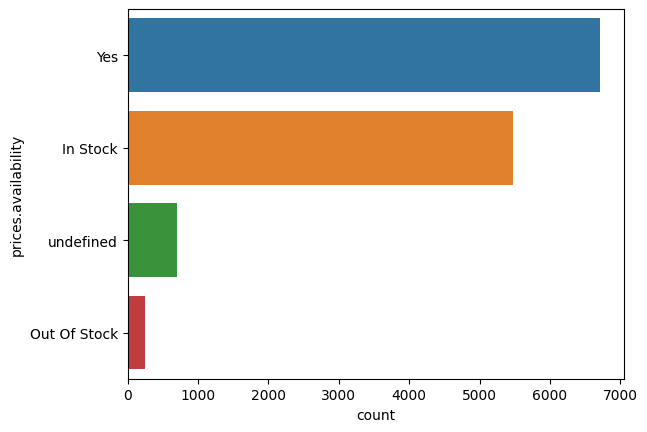

In [213]:
sns.countplot(y=df['prices.availability'], order=df['prices.availability'].value_counts().index)

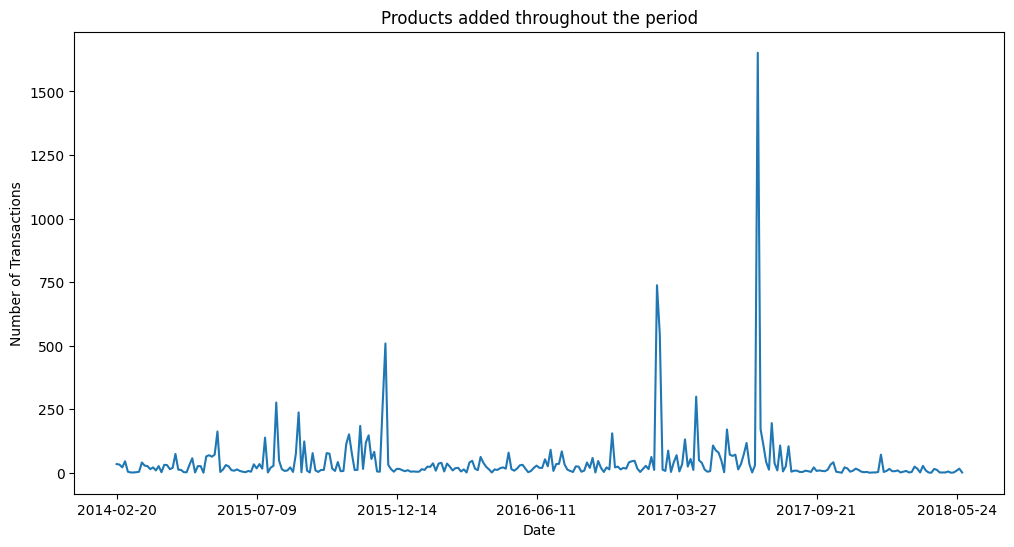

In [216]:
df['dateAdded'] = df['dateAdded']
transactions_over_time = df.groupby('dateAdded').size()
plt.figure(figsize=(12, 6))
transactions_over_time.plot()
plt.title("Products added throughout the period")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

Text(0.5, 0, 'price')

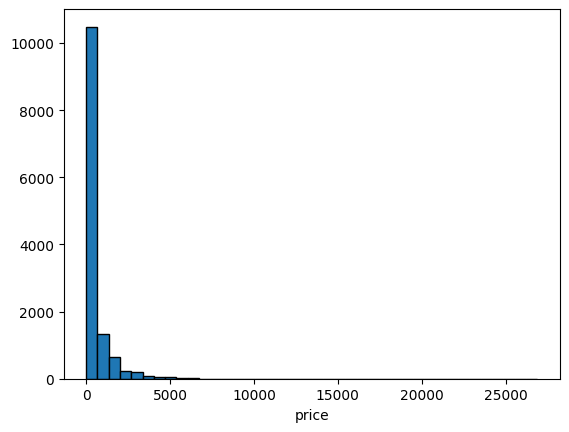

In [220]:
plt.hist(df['prices.amountMax'], bins=40, edgecolor='black')
plt.xlabel('price')

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


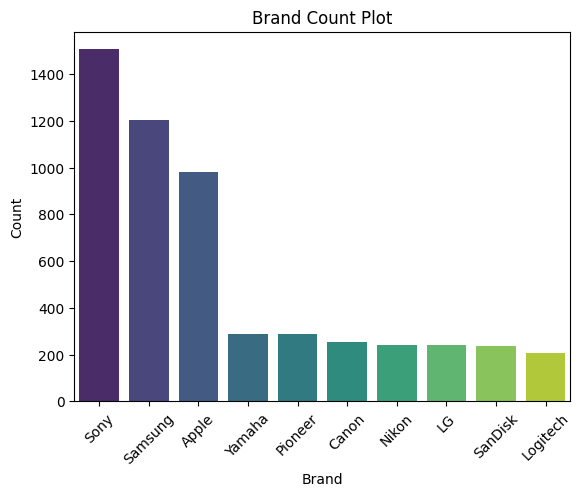

In [243]:
top_10_widespread_brands = df['brand'].value_counts().sort_values(ascending=False)[:10].to_frame().reset_index()

sns.barplot(x='brand', y='count', data=top_10_widespread_brands, palette='viridis')
plt.title('Brand Count Plot')
plt.ylabel('Count')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


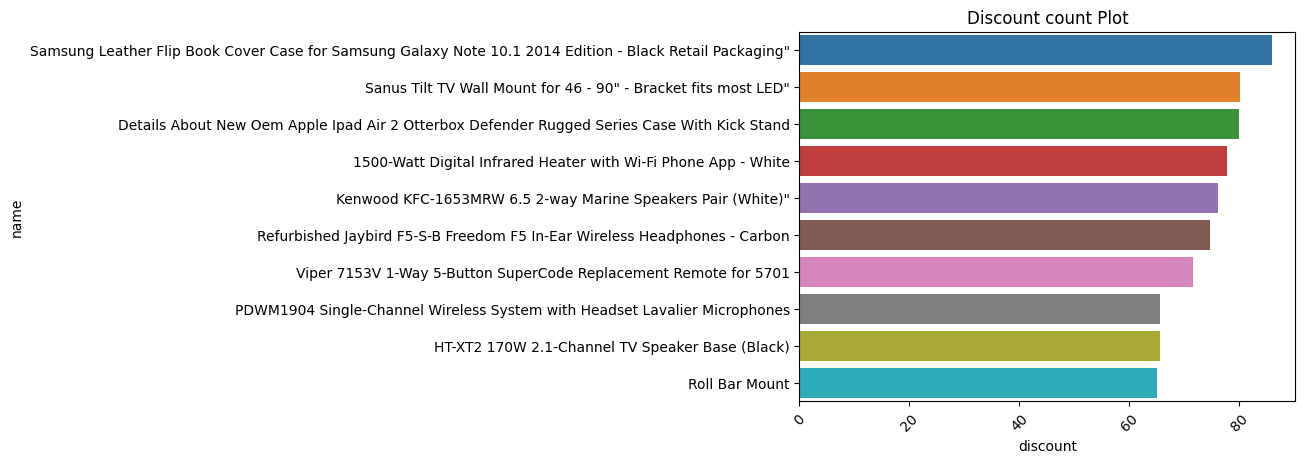

In [261]:
top_10_discounted_products = df.sort_values(by='discount', ascending=False).drop_duplicates(subset='name').reset_index(drop=True)[['name', 'discount']][:10]

sns.barplot(x='discount', y='name', data=top_10_discounted_products)
plt.title('Discount count Plot')
plt.ylabel('name')
plt.xlabel('discount')
plt.xticks(rotation=45)
plt.show()